# **LIME HANDS-ON** 

## Knowledge Engineering and Digital Humanities

### Exercise 10.2

M.Sc. Erasmo Purificato

# Explanations for image classification 

## Importing libraries 

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 4.8MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=6aa08a1c510f7a3c21448257f5df9557320a07fc55b6185eccac2fd8a98cd056
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
## EXAMPLE OF IMPORT FOR USING AN INCEPTION V3 NEURAL NETWORK
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import inception_v3
from keras.applications.imagenet_utils import decode_predictions
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

Using TensorFlow backend.


## Defining a function to preprocess image

#### <span style="color:blue">Write code here!</span>

In [ ]:
from keras.applications.inception_v3 import preprocess_input
image = load_img("/content/cat_dog.jpg", target_size=(299,299))
img = img_to_array(image)
img = preprocess_input(img)

## Build you ML model

#### <span style="color:blue">Write code here!</span>

In [ ]:
net_model = inception_v3.InceptionV3()

96116736/96112376 [==============================] - 2s 0us/step


## Visualize image after preprocess it

#### <span style="color:blue">Write code here!</span>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


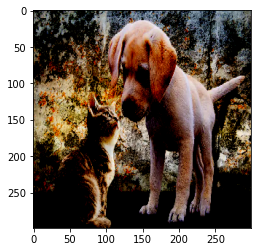

In [ ]:
plt.imshow(img)

## Get preditions

Let's see the Top-5 predictions for some image  

#### <span style="color:blue">Write code here!</span>

In [ ]:
preds = net_model.predict(img[np.newaxis,:,:,:])
decode_predictions(preds) #Print top 5 classes

40960/35363 [==================================] - 0s 0us/step


[[('n02099712', 'Labrador_retriever', 0.3846511),
  ('n02088364', 'beagle', 0.032976136),
  ('n02123045', 'tabby', 0.025716066),
  ('n02123159', 'tiger_cat', 0.018768502),
  ('n02124075', 'Egyptian_cat', 0.01821946)]]

## Explanable model 

#### <span style="color:blue">Write code here!</span>

In [ ]:
from lime.lime_image import LimeImageExplainer
explainer= LimeImageExplainer()

In **_explain instance_** method below, _hide color_ is the color for a superpixel turned OFF (0 means gray).

Alternatively, if it is _None_, the superpixel will be replaced by the average of its pixels.

#### <span style="color:blue">Write code here!</span>

In [ ]:
explanation=explainer.explain_instance(img,net_model.predict)

## Explanable interface 

Get label name 

In [ ]:
explanation.top_labels

[208, 162, 281, 282, 285]

We can see the superpixels that are most positive towards the class, in different views:

#### **1.** With the rest of the image hidden

#### <span style="color:blue">Write code here!</span>

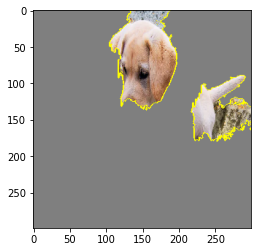

In [ ]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(208, positive_only=True, hide_rest=True)
plt.imshow(mark_boundaries(temp/2+0.5, mask))

#### **2.** With the rest of the image present 

#### <span style="color:blue">Write code here!</span> 

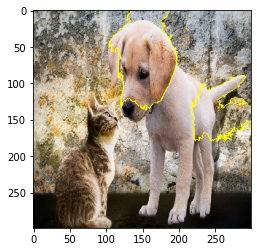

In [ ]:
temp, mask = explanation.get_image_and_mask(208, positive_only=True, hide_rest=False)
plt.imshow(mark_boundaries(temp/2 +0.5, mask))

#### **3.** With positive and negative contributes in the whole image

#### <span style="color:blue">Write code here!</span>

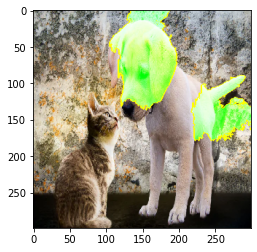

In [ ]:
temp, mask = explanation.get_image_and_mask(208, positive_only=False, hide_rest=False)
plt.imshow(mark_boundaries(temp/2 +0.5, mask))

#### **4.** With positive and negative contributes that have weight at least 0.1

#### <span style="color:blue">Write code here!</span>

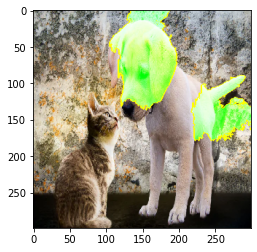

In [ ]:
temp, mask = explanation.get_image_and_mask(208, positive_only=False, hide_rest=False,min_weight=0.1)
plt.imshow(mark_boundaries(temp/2 +0.5, mask))